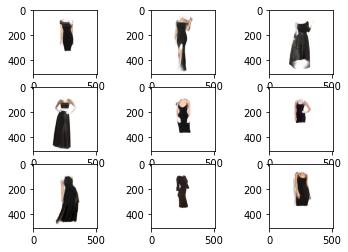

In [9]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = './cloth/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'd_c' + ' ' + str(i+1) + '.png'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

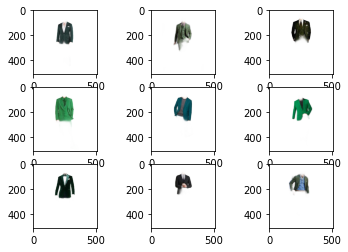

In [11]:
folder = 'cloth/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 's_c' + ' ' + str(i+1) + '.png'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

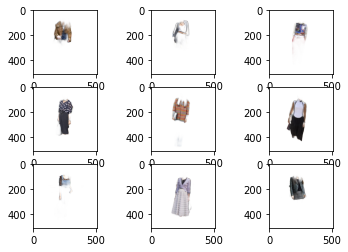

In [14]:
folder = 'cloth/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'da_c' + ' (' + str(i+1) + ')' + '.png'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [30]:
from os import listdir
from numpy import asarray
from numpy import save
import tensorflow as tf
import os
import random
# define location of dataset
folder = 'cloth/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 0.0
	if file.startswith('d_c'):
		output = 1.0
	# load image
	photo = tf.keras.preprocessing.image.load_img(folder + file, target_size=(200, 200))
	# convert to numpy array
	photo = tf.keras.preprocessing.image.img_to_array(photo)
	# store
	photos.append(photo)
	labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('dress_vs_suit_vs_daily_photos.npy', photos)
save('dress_vs_suit_vs_daily_labels.npy', labels)

(228, 200, 200, 3) (228,)


In [31]:
# load and confirm the shape
from numpy import load
photos = load('dress_vs_suit_vs_daily_photos.npy')
labels = load('dress_vs_suit_vs_daily_labels.npy')
print(photos.shape, labels.shape)

(228, 200, 200, 3) (228,)


In [35]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'dress_vs_suit_vs_daily/'
subdirs = ['cloth/', 'cloth_test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['cloth_suit/', 'cloth_dailylook/','cloth_dress/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'cloth/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'cloth/'
	if random() < val_ratio:
		dst_dir = 'cloth_test/'
	if file.startswith('cloth_suit'):
		dst = dataset_home + dst_dir + 'cloth_suit/'  + file
		copyfile(src, dst)
	elif file.startswith('cloth_dailylook'):
		dst = dataset_home + dst_dir + 'cloth_dailylook/'  + file
		copyfile(src, dst)
	elif file.startswith('cloth_dress'):
		dst = dataset_home + dst_dir + 'cloth_dress/'  + file
		copyfile(src, dst)

In [70]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(51, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(102, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [71]:
# define model
model = define_model()

In [72]:
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [73]:
# prepare iterators
train_it = datagen.flow_from_directory('dress_vs_suit_vs_daily/cloth/',
	class_mode='categorical', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory('dress_vs_suit_vs_daily/cloth_test/',
	class_mode='categorical', batch_size=64, target_size=(200, 200))

Found 228 images belonging to 3 classes.
Found 103 images belonging to 3 classes.


In [74]:
# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
	validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)

In [75]:
# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

> 73.786
